In [1]:
#Loading all the packages
import pandas as pd
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib inline
data=loadmat('ex6data1')
print(data.keys()) #dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
#taking the feature matrix and the output matrix
X=data['X']
y=data['y'].flatten()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [2]:
def plotData(X, y):
    
    # get indices of 1 and 0 y values
    pos = y == 1
    neg = y == 0
    # plot positive (i.e., accepted) points
    plt.plot(X[pos,0], X[pos,1], '+', color='k', ms=7, mew=2)
    
    # plot negative (i.e., not accepted) points
    plt.plot(X[neg,0], X[neg,1], 'o', color='y', ms=7)

    
def visualizeBoundary(X, y, clf):
    
    # plot data on top of bounary
    plotData(X, y)
    
    # make classification predictions over a grid of values
    x1 = np.linspace(X[:,0].min(), X[:,0].max(), 100)
    x2 = np.linspace(X[:,1].min(), X[:,1].max(), 100)
    X1, X2 = np.meshgrid(x1, x2)
    vals = np.zeros(X1.shape)
    for ii in range(100):
        this_X = np.vstack((X1[:,ii], X2[:,ii])).T
        vals[:, ii] = clf.predict(this_X)
        
    plt.contour(X1, X2, vals, [0,0])


E:\Anaconda\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


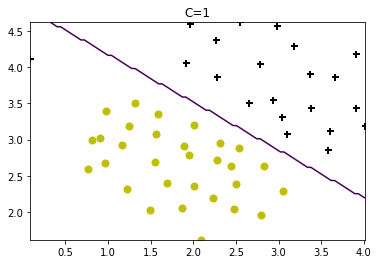

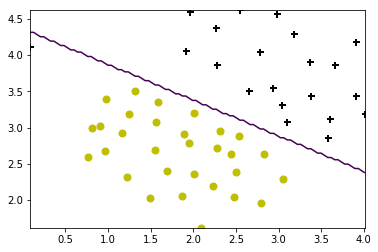

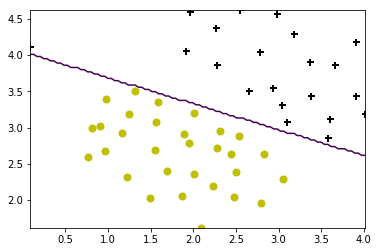

In [3]:
from  sklearn.svm import SVC
# train SVM with different C values
# C = 1
C = 1.0
clf = SVC(C=C, kernel='linear')
clf.fit(X, y) 
visualizeBoundary(X, y, clf)
plt.title('C=1')
C=10.0
clf=SVC(C=C,kernel='linear')
clf.fit(X,y)
plt.figure()
visualizeBoundary(X,y,clf)
C=100.0
clf=SVC(C=C,kernel='linear')
clf.fit(X,y)
plt.figure()
visualizeBoundary(X,y,clf)

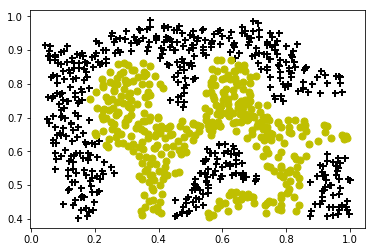

In [4]:
#Using Guassian Kernel Now
data=loadmat('ex6data2.mat')
X=data['X']
y=data['y'].flatten()
plotData(X,y)

E:\Anaconda\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


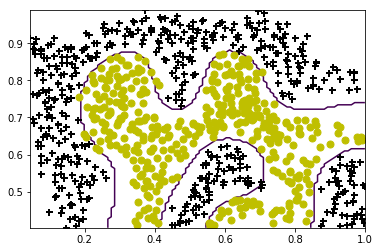

In [5]:
#using The Gausian Kernel
C=1.0
sigma=0.1
gamma=1/2/sigma**2
clf=SVC(C=C,kernel='rbf',gamma=gamma)
clf.fit(X,y)
visualizeBoundary(X,y,clf)

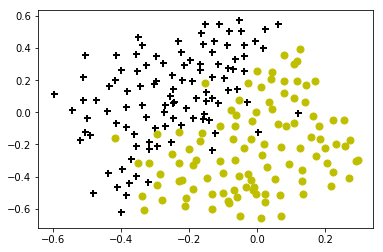

In [6]:
#Dataset3
data=loadmat('ex6data3.mat')
X=data['X']
y=data['y'].flatten()
Xval=data['Xval']
yval=data['yval'].flatten()
plotData(X,y)

3.5000000000000004
Accuracy of the model is 96.5


E:\Anaconda\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


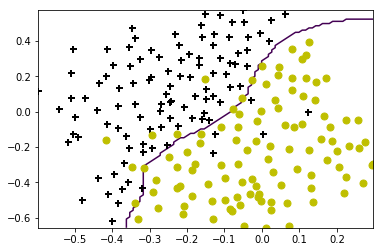

In [7]:
#Using Guassian Kernel
C=1
sigma=0.1
gamma==1/2/sigma**2
clf=SVC(kernel='rbf',gamma=gamma,C=C)
clf.fit(X,y)
pred=clf.predict(Xval)
print((np.mean(pred!=yval))*100)
print("Accuracy of the model is {}".format(clf.score(Xval,yval)*100))
visualizeBoundary(X,y,clf)

In [8]:
sTrain = loadmat('spamTrain.mat')
sTest  = loadmat('spamTest.mat')

print(sTrain.keys(), sTest.keys())
xTrain=sTrain['X']
yTrain=sTrain['y'].flatten()
#Now Taking The Test Set
xTest=sTest['Xtest']
yTest=sTest['ytest'].flatten()
#Training Model
C=1000
sigma=10
gamma=1/2/sigma**2
clf=SVC(kernel='rbf',C=C,gamma=gamma)
clf.fit(xTrain,yTrain)
print("The accuracy on the training set is {}".format(clf.score(xTrain,yTrain)*100))
#Accuracy  on the test set
# run on test set
print('Test Accuracy = {0} percent'.format(
    clf.score(xTest, yTest)*100))

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y']) dict_keys(['__header__', '__version__', '__globals__', 'Xtest', 'ytest'])
The accuracy on the training set is 100.0
Test Accuracy = 98.0 percent
